# Plotting Examples

In [34]:
workingdir = '/Users/Ted/__Princeton/__G2_Spring/__COS_424/voxDemo'
!cd {workingdir} 
!/Applications/MATLAB_R2015b.app/bin/matlab -nodisplay -nosplash -nodesktop -r "run('collect_chroma.m');exit;"
!ls

=
                            < M A T L A B (R) >
                  Copyright 1984-2015 The MathWorks, Inc.
                   R2015b (8.6.0.267246) 64-bit (maci64)
                              August 20, 2015

 
To get started, type one of these: helpwin, helpdesk, or demo.
For product information, visit www.mathworks.com.
 
    ----------------------------------------------------
	Your MATLAB license will expire in 22 days.
	Please contact your system administrator or
	MathWorks to renew this license.
    ----------------------------------------------------

	Academic License

>COS424_HW1_Precept.ipynb Graphing_Demo.ipynb      data
Chroma.mat               LB.mat                   featureTable.png
FV.mat                   README.md                tools
FV_concat.m              collect_chroma.m


In [40]:
fileN = '/Users/Ted/__Princeton/__G2_Spring/__COS_424/voxDemo/Chroma.mat'
X = spio.loadmat(fileN)['chroma'][0,:]
totals = sum(X)
print totals
plt.figure()
plt.title('Chroma for blues00003 frames')
plt.xlabel('Chroma')
plt.ylabel('Magnitude')
plt.bar(range(0,totals.shape[0]),sum(totals.T))
plt.show()

[[ 525431.45476616]
 [ 459330.08183666]
 [ 488838.99967986]
 [ 411376.21368994]
 [ 423449.32157489]
 [ 386598.77690254]
 [ 350534.2946914 ]
 [ 537587.08170245]
 [ 603282.21193151]
 [ 612646.5400831 ]
 [ 545593.00517702]
 [ 530230.96545164]]


# More Graphs!!!

In [15]:
import random as random
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import zero_one_loss
from sklearn.cross_validation import StratifiedKFold

FVs = '/Users/Ted/__Princeton/__G2_Spring/__COS_424/voxDemo/FV.mat'
LBs = '/Users/Ted/__Princeton/__G2_Spring/__COS_424/voxDemo/LB.mat'
mfcc = spio.loadmat(FVs)['FV']
labels = spio.loadmat(LBs)['LB'][0]
N = mfcc.shape[1]


k = 10


nLearners = np.array([5,10,25,50,100,250])
averageError = np.zeros(nLearners.shape)
for i in range(0,len(nLearners)):
    maxLearners = nLearners[i]
    skf = StratifiedKFold(labels,n_folds=k)
    for train_index, test_index in skf:
        X_train, X_test = mfcc[:,train_index], mfcc[:,test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        rf = RandomForestClassifier(n_estimators=maxLearners, max_depth = 5, warm_start = False)
        rf.fit(X_train.T,y_train)
        y_pred = rf.predict(X_test.T)
        error = zero_one_loss(y_pred,y_test)
        averageError[i] += (1./k) * error
    print "Average error %d: %4.2f%s" % (i, 100 * averageError[i],'%')



Average error 0: 60.97%
Average error 1: 57.51%
Average error 2: 49.60%
Average error 3: 46.75%
Average error 4: 46.24%
Average error 5: 46.14%


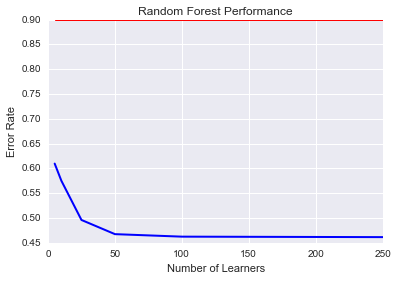

In [17]:
plt.figure()
plt.plot(nLearners,averageError,'b',lw = 2)
plt.plot(nLearners,np.ones(nLearners.shape) * 0.9,'r',lw = 1)
plt.xlabel('Number of Learners')
plt.ylabel('Error Rate')
plt.title('Random Forest Performance')
plt.show()